In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
vocab_len=10000
max_len=200
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=vocab_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_len)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_len)

In [7]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape


((25000, 200), (25000,), (25000, 200), (25000,))

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_len,32),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
history=model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.6500 - loss: 0.5866 - val_accuracy: 0.8486 - val_loss: 0.3435
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9407 - loss: 0.1667 - val_accuracy: 0.8553 - val_loss: 0.3504
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9929 - loss: 0.0373 - val_accuracy: 0.8499 - val_loss: 0.4274
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9981 - loss: 0.0098 - val_accuracy: 0.8535 - val_loss: 0.4859
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.8478 - val_loss: 0.5434


<Axes: >

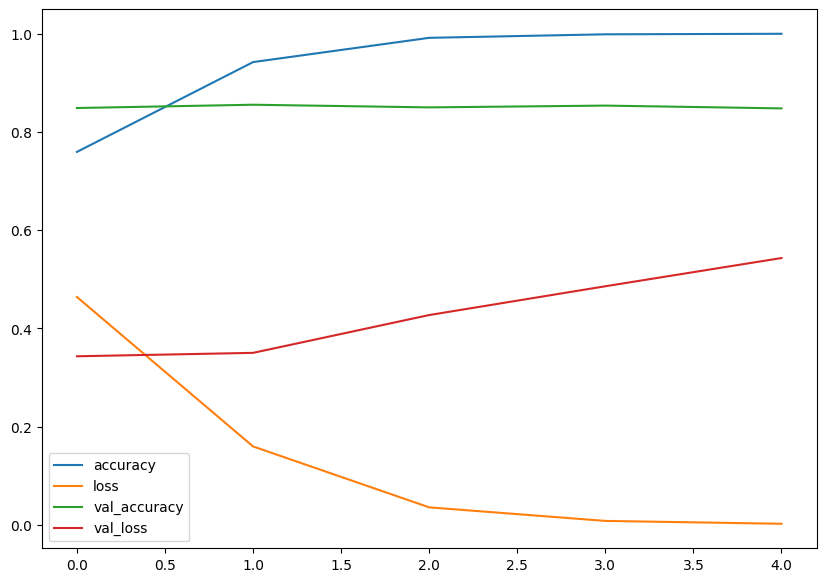

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [15]:
loss,acc = model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8479 - loss: 0.5438


In [16]:
print(f"loss{loss}")
print(f"accuracy:{acc}")

loss0.5433673858642578
accuracy:0.8478400111198425
